In [1]:
import pandas as pd
from src.pipeline.select_features import get_feature_importance
from src.pipeline.pipeline import pipeline
from src.data.get_dataset import get_merged_datasets
# get merged dataframe
dataframe = get_merged_datasets()
# Remove feature we do not want to use.
dataframe.drop(columns=['year','country','iso_code'], inplace=True)

## Transform data and perform test train split

In [2]:
x_train, x_test, y_train, y_test, feature_list = pipeline(dataframe)

C:\Users\karis\PycharmProjects\co2-emission-ML\src\pipeline\pipeline.py:78: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['female_children_by_percent'] = df[fem_child].sum(axis=1)
C:\Users\karis\PycharmProjects\co2-emission-ML\src\pipeline\pipeline.py:79: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['female_working_age_by_percent'] = df[fem_work_age].sum(axis=1)
C:\Users\karis\PycharmProjects\co2-emission-ML\src\pipeline\pipeline.py:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

In [3]:
feature_importance_linear = get_feature_importance(x_train, y_train,
                                                   feature_list, type="Linear")
feature_importance_forest = get_feature_importance(x_train, y_train,
                                                   feature_list,type="RandomForest")
feature_importance_tree = get_feature_importance(x_train, y_train,
                                                 feature_list,
                                                 type="Tree")

feature_importance = pd.merge(feature_importance_linear, feature_importance_tree, left_index=True, right_index=True, how='inner',
                              suffixes=("_linear", "_tree"))
feature_importance = pd.merge(feature_importance, feature_importance_forest, left_index=True, right_index=True, how='inner')
feature_importance.rename(columns={'Importance':'Importance_forest'}, inplace=True)

In [4]:
feature_list = sorted(feature_importance.index.to_list())

## Scale feature importance

In [5]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
feature_importance_abs = feature_importance.abs()
scalar.fit(feature_importance_abs)
feature_importance_abs_scaled = scalar.transform(feature_importance_abs)
feature_importance_abs_scaled = pd.DataFrame(feature_importance_abs_scaled,
                                             index=feature_importance_abs.index,
                                             columns=feature_importance_abs.columns)
feature_importance_abs_scaled

,Importance_linear,Importance_tree,Importance_forest
male_working_age_by_percent,1.000000e+00,2.004366e-05,0.000554
male_children_by_percent,2.062013e-01,0.000000e+00,0.000701
male_retired_by_percent,1.979461e-01,1.769313e-03,0.000104
primary_energy_consumption,7.896244e-11,1.000000e+00,1.000000
renewables_consumption,2.206411e-11,3.639224e-05,0.003080
coal_consumption,1.856508e-11,2.780284e-04,0.036140
gdp,7.408170e-12,2.125312e-05,0.070460
coal_production,5.140126e-12,6.573316e-02,0.176341
gas_consumption,2.503262e-12,3.817891e-06,0.000000
cropland_area_in_hectares,2.343860e-12,4.097494e-06,0.000331


## Choosing feature importance by scaled abs value

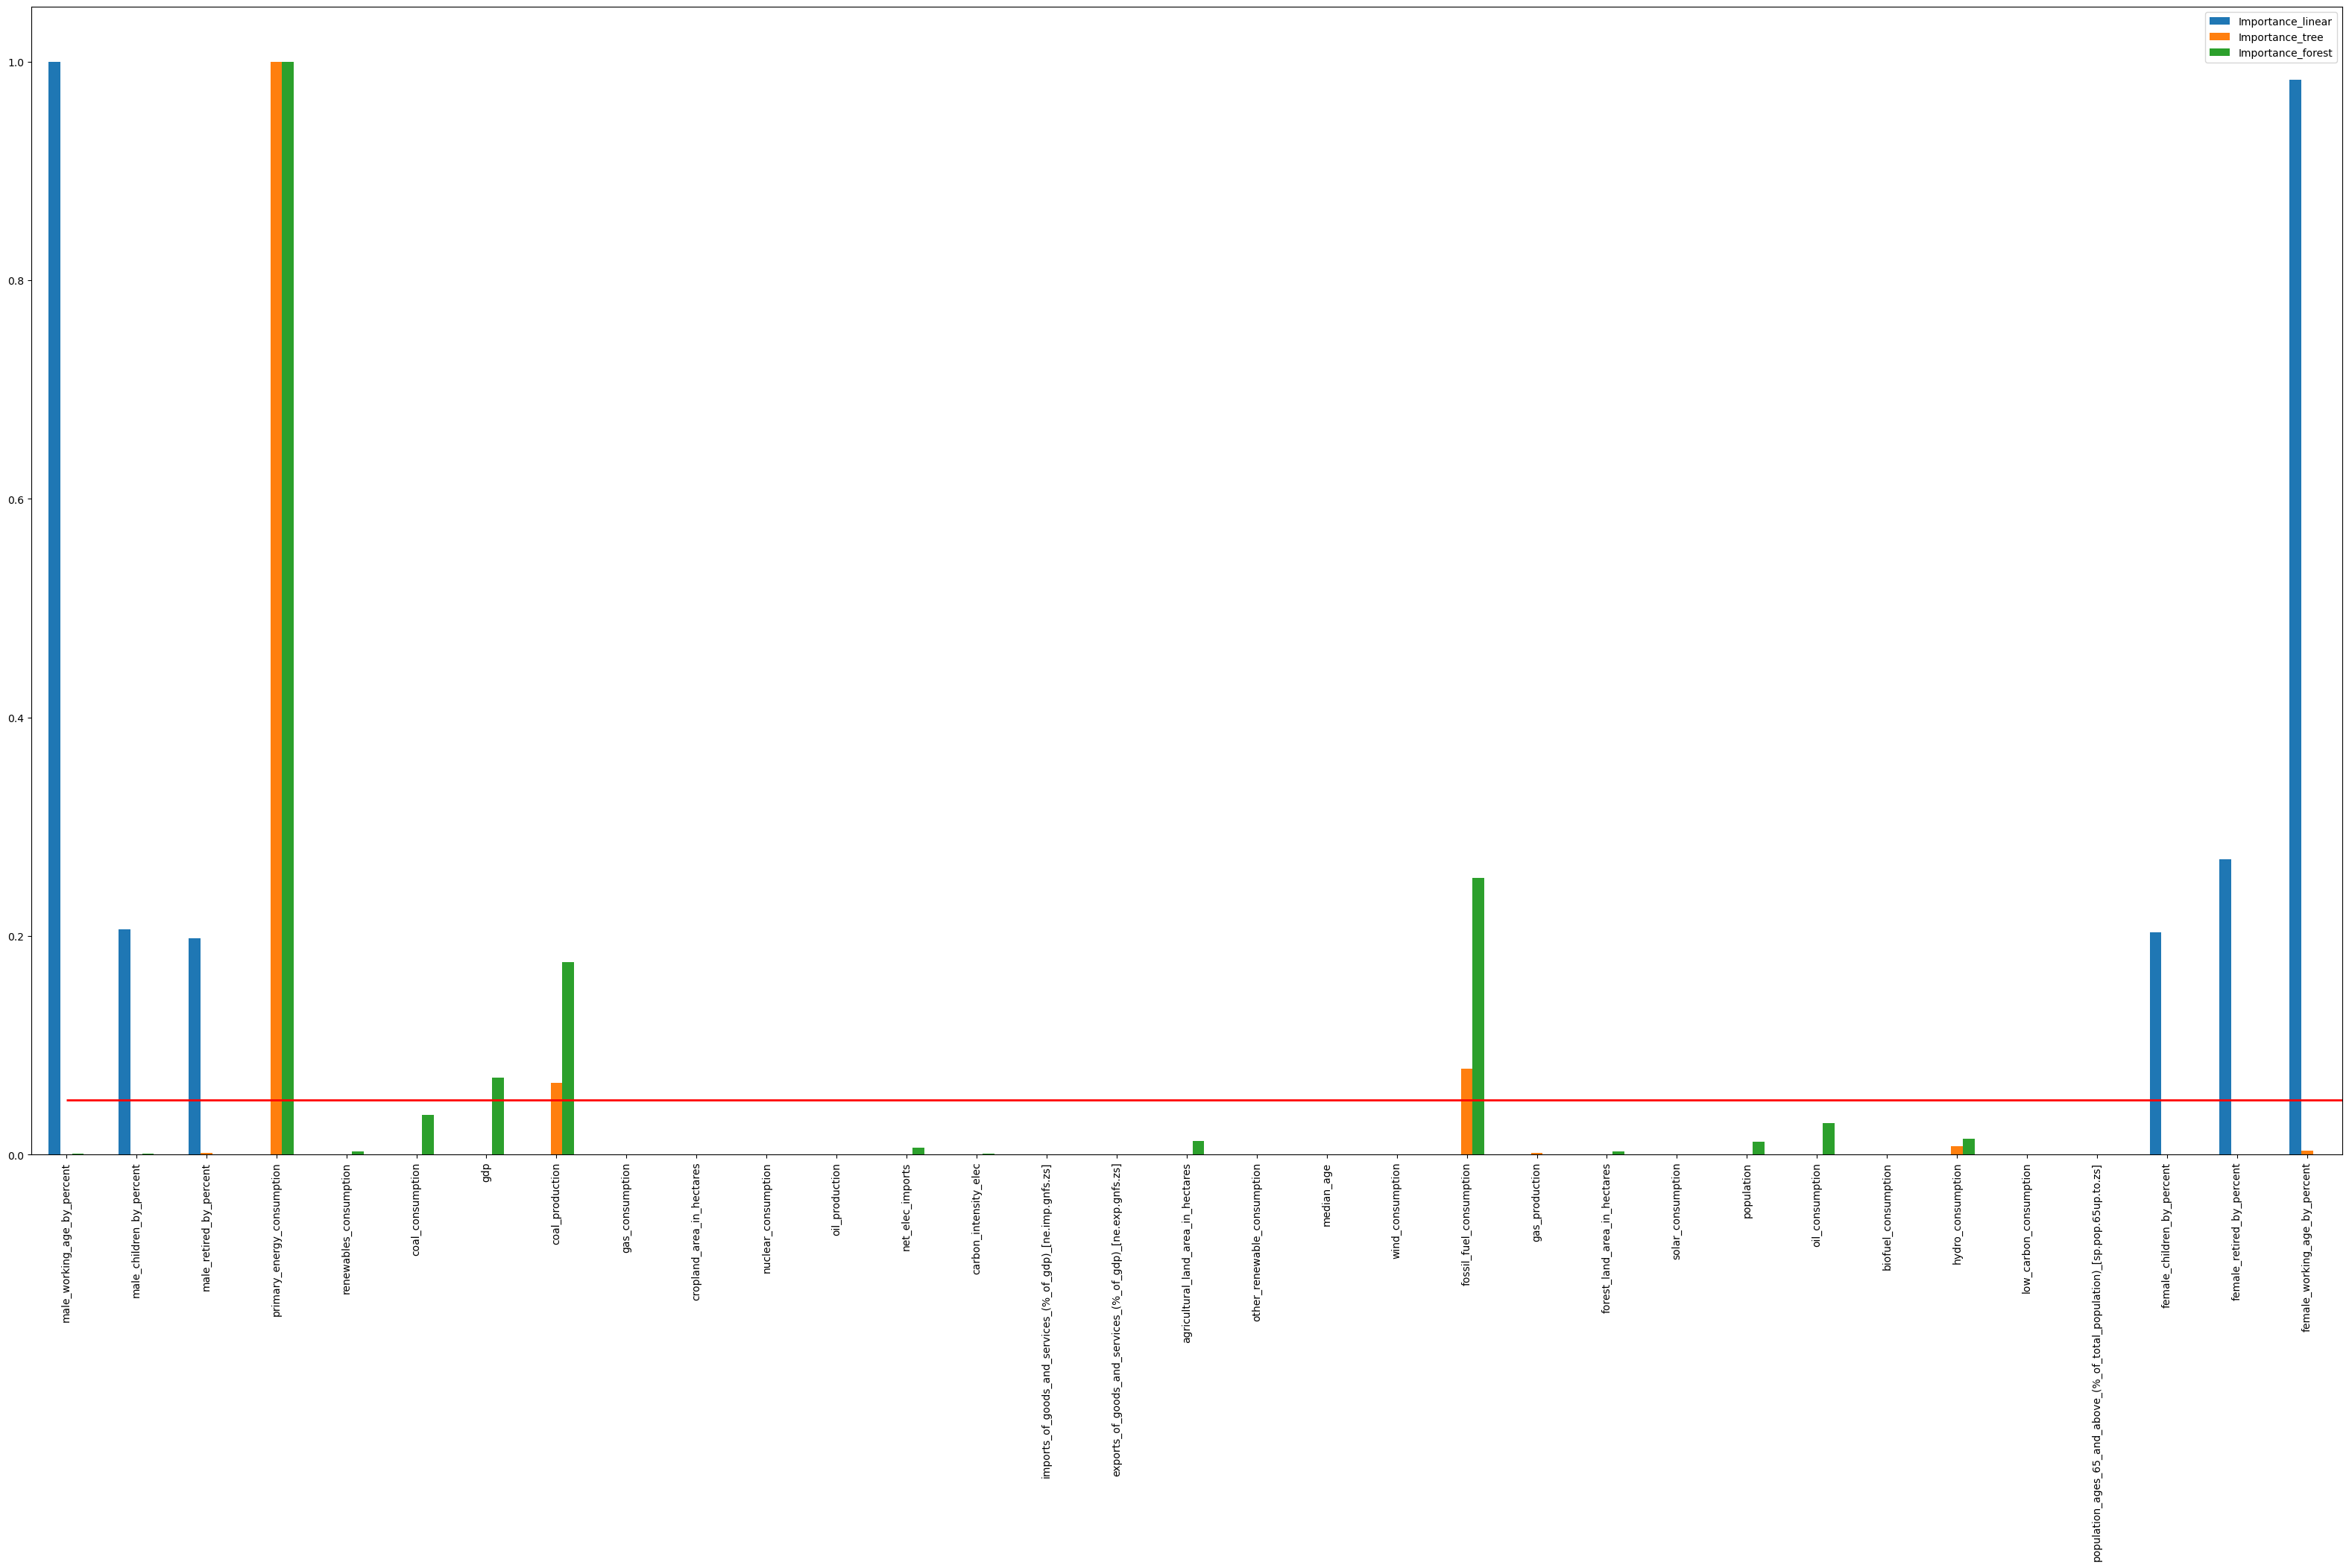

In [6]:
import matplotlib.pyplot as plt
# Set cut off value
suggested_cut_off = 0.05

plot = feature_importance_abs_scaled.plot(kind='bar', figsize=(40,20))
plot.hlines(suggested_cut_off,linewidth=2, xmin=0, xmax=len(feature_list), color='r')
plt.savefig('Feature_selection.png')

Inspect cutoff Value in saved fig. This seems reasonable.

### Get set of Selected features

In [7]:
linear_top = feature_importance_abs_scaled.index[feature_importance_abs_scaled.Importance_linear>=suggested_cut_off].tolist()
tree_top = feature_importance_abs_scaled.index[feature_importance_abs_scaled.Importance_tree>=suggested_cut_off].tolist()
forest_top = feature_importance_abs_scaled.index[feature_importance_abs_scaled.Importance_forest>=suggested_cut_off].tolist()
top_features = linear_top+tree_top+forest_top
top_features = set(top_features)
len(top_features)

10

In [8]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

linear_model = LinearRegression()
lasso_model = Lasso(random_state=42)
ridge_model = Ridge(random_state=42)
dec_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)
models = [linear_model, lasso_model, ridge_model, dec_tree_model, random_forest_model]
x_train = x_train[list(top_features)]
x_test = x_test[list(top_features)]
for m in models:
    m.fit(x_train, y_train)

In [9]:
from sklearn.metrics import  mean_squared_error, r2_score, mean_absolute_error
from src.models.predict_model import  adjusted_r2
training_predictions = [m.predict(x_train) for m in models]
mean_sq_errors = [mean_squared_error(y_train, y) for y in training_predictions]
r2_scores = [r2_score(y_train, y) for y in training_predictions]
adj_r2_scores = [adjusted_r2(score, len(x_train),len(x_train.columns)) for score in r2_scores]
mean_absolute_errors = [mean_absolute_error(y_train, y) for y in training_predictions]
print("Train data scores")
[print(f" {model.__class__.__name__}:, Adjusted R2 score: {adj_r2_scores[i]}, Mean absolute Error: {mean_absolute_errors[i]}") for i, model in enumerate(models)]

Train data scores
 LinearRegression:, Adjusted R2 score: 0.9957112040095936, Mean absolute Error: 26.94677679473026
 Lasso:, Adjusted R2 score: 0.9956145837303148, Mean absolute Error: 26.588066599045636
 Ridge:, Adjusted R2 score: 0.9957079673169543, Mean absolute Error: 27.132932880705116
 DecisionTreeRegressor:, Adjusted R2 score: 1.0, Mean absolute Error: 7.041583665698667e-20
 RandomForestRegressor:, Adjusted R2 score: 0.9996415004390897, Mean absolute Error: 2.810643412262139


[None, None, None, None, None]

In [10]:

predictions = [m.predict(x_test) for m in models]
mean_sq_errors = [mean_squared_error(y_test, y) for y in predictions]
r2_scores = [r2_score(y_test, y) for y in predictions]
adj_r2_scores = [adjusted_r2(score, len(x_test),len(x_test.columns)) for score in r2_scores]
mean_absolute_errors = [mean_absolute_error(y_test, y) for y in predictions]
print("Test data scores")
[print(f" {model.__class__.__name__}:, Adjusted R2 score: {adj_r2_scores[i]}, Mean absolute Error: {mean_absolute_errors[i]}") for i, model in enumerate(models)]

Test data scores
 LinearRegression:, Adjusted R2 score: 0.9946811063587204, Mean absolute Error: 31.906340024002795
 Lasso:, Adjusted R2 score: 0.994563871369005, Mean absolute Error: 31.065251727325403
 Ridge:, Adjusted R2 score: 0.9946497885469391, Mean absolute Error: 32.03801709366311
 DecisionTreeRegressor:, Adjusted R2 score: 0.9757194523378355, Mean absolute Error: 17.588479729729727
 RandomForestRegressor:, Adjusted R2 score: 0.9962274479953775, Mean absolute Error: 10.582536435810825


[None, None, None, None, None]

In [32]:
from sklearn.model_selection import GridSearchCV
import os
best_hyper_params_csv = 'best_hyper_params.csv'

best_params_records = []
grid = {'fit_intercept':[True, False]}
CV_lin = GridSearchCV(estimator=linear_model, param_grid=grid, cv=5, scoring='neg_median_absolute_error', n_jobs=-1)
CV_lin.fit(x_train, y_train)
best_params_records.append({'model': 'linear regression', **CV_lin.best_params_})

grid = {'alpha': [0.1,2], 'max_iter': [100, 2000], 'tol': [0.01, 0.0001]}
CV_lasso = GridSearchCV(estimator=lasso_model, param_grid=grid, cv=5, scoring='neg_median_absolute_error', n_jobs=-1)
CV_lasso.fit(x_train, y_train)
best_params_records.append({'model': 'lesso', **CV_lasso.best_params_})
CV_ridge = GridSearchCV(estimator=ridge_model, param_grid=grid, cv=5, scoring='neg_median_absolute_error', n_jobs=-1)
CV_ridge.fit(x_train, y_train)
best_params_records.append({'model': 'ridge', **CV_ridge.best_params_})
grid = {'n_estimators': [100,200,500,1000],
               'max_features': ['sqrt', 'log2'],
               'max_depth': [10,20,50,100],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

CV_forest = GridSearchCV(estimator=random_forest_model, param_grid=grid, cv=5, scoring='neg_median_absolute_error', n_jobs=-1)
CV_forest.fit(x_train, y_train)
best_params_records.append({'model': 'Forest', **CV_forest.best_params_})
grid = {'max_features': ['sqrt', 'log2'],
               'max_depth': [10,20,50,100],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4]}

CV_tree = GridSearchCV(estimator=dec_tree_model, param_grid=grid, cv=5, scoring='neg_median_absolute_error', n_jobs=-1)
CV_tree.fit(x_train, y_train)
best_params_records.append({'model': 'Tree', **CV_tree.best_params_})
best_hyper_params = pd.DataFrame.from_records(best_params_records)
best_hyper_params.to_csv("best_hyper_params.csv", index=False)

## Ensmble Modelling via Voting Regressor

In [33]:
from sklearn.ensemble import VotingRegressor

voting_model = VotingRegressor(estimators=[("lasso", lasso_model), ("ridge", ridge_model), ("linear", linear_model), ("dec_tree", dec_tree_model)], n_jobs=-1, verbose=True)
voting_model.fit(x_train, y_train)

VotingRegressor(estimators=[('lasso', Lasso(random_state=42)),
                            ('ridge', Ridge(random_state=42)),
                            ('linear', LinearRegression()),
                            ('dec_tree',
                             DecisionTreeRegressor(random_state=42))],
                n_jobs=-1, verbose=True)

In [34]:
random_forest_model = CV_forest.best_estimator_

In [45]:
models = [ CV_lasso.best_estimator_, CV_ridge.best_estimator_, CV_lin.best_estimator_, CV_tree.best_estimator_, voting_model, random_forest_model,]
training_predictions = [m.predict(x_train) for m in models]
mean_sq_errors = [mean_squared_error(y_train, y) for y in training_predictions]
r2_scores = [r2_score(y_train, y) for y in training_predictions]
adj_r2_scores = [adjusted_r2(score, len(x_train),len(x_train.columns)) for score in r2_scores]
mean_absolute_errors = [mean_absolute_error(y_train, y) for y in training_predictions]
print("Train data scores")
[print(f" {model.__class__.__name__}: Adjusted R2 score: {adj_r2_scores[i]}, Mean absolute Error: {mean_absolute_errors[i]}") for i, model in enumerate(models)]

Train data scores
 Lasso: Adjusted R2 score: 0.9957031182182575, Mean absolute Error: 26.714992918070294
 Ridge: Adjusted R2 score: 0.9957111856176697, Mean absolute Error: 26.957044093851202
 LinearRegression: Adjusted R2 score: 0.9957112040095936, Mean absolute Error: 26.94677679473026
 DecisionTreeRegressor: Adjusted R2 score: 0.9999999250835806, Mean absolute Error: 0.04524331894010727
 VotingRegressor: Adjusted R2 score: 0.9975810816377537, Mean absolute Error: 20.0309590968233
 RandomForestRegressor: Adjusted R2 score: 1.0, Mean absolute Error: 2.200187548007785e-12


[None, None, None, None, None, None]

In [46]:
predictions = [m.predict(x_test) for m in models]
mean_sq_errors = [mean_squared_error(y_test, y) for y in predictions]
r2_scores = [r2_score(y_test, y) for y in predictions]
adj_r2_scores = [adjusted_r2(score, len(x_test),len(x_test.columns)) for score in r2_scores]
mean_absolute_errors = [mean_absolute_error(y_test, y) for y in predictions]
print("Test data scores")
[print(f" {model.__class__.__name__}: Adjusted R2 score: {adj_r2_scores[i]}, Mean absolute Error: {mean_absolute_errors[i]}") for i, model in enumerate(models)]

Test data scores
 Lasso: Adjusted R2 score: 0.994666911000342, Mean absolute Error: 31.55610689526197
 Ridge: Adjusted R2 score: 0.9946778296997736, Mean absolute Error: 31.908903257160116
 LinearRegression: Adjusted R2 score: 0.9946811063587204, Mean absolute Error: 31.906340024002795
 DecisionTreeRegressor: Adjusted R2 score: 0.985741040522805, Mean absolute Error: 18.13265073251429
 VotingRegressor: Adjusted R2 score: 0.9959082095738001, Mean absolute Error: 25.92634781935475
 RandomForestRegressor: Adjusted R2 score: 0.995303447597153, Mean absolute Error: 9.678229380066915


[None, None, None, None, None, None]